# Análise dos Dados da Copa do Mundo
Com base na página da Wikipedia sobre Copa do Mundo

Link -> https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA

In [1]:
# Importando as biliotecas
import pandas as pd
import requests

In [2]:
# Requisitar os dados do servidor
# Site onde estão os dados
site = 'https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA'
# Requisicao para obter os dados
resposta = requests.get(site)

In [3]:
# Obtendo apenas os dados em HTML
tabelas = pd.read_html(resposta.text)

tabelas

[                                                    0  \
 0                                  Copa do Mundo FIFA   
 1                                        Dados gerais   
 2                                         Organização   
 3                                             Edições   
 4                                    Local de disputa   
 5                                             Sistema   
 6   Dados históricos  Primeiro vencedor  Uruguai (...   
 7                                    Dados históricos   
 8                                   Primeiro vencedor   
 9                                     Último vencedor   
 10  Estatísticas  Total de gol(o)s 2 548  Total de...   
 11                                       Estatísticas   
 12                                   Total de gol(o)s   
 13                                     Total de jogos   
 14                                              Média   
 15                                       Edição atual   
 16           

In [5]:
# Queremos a tabela com os dados de Público Pagante das Finais
# Essa é a 12º tabela do arquivo

# Vamos criar um DataFrame usando apenas essa tabela
df = tabelas[11]

df.head()

0     1                                     2               3  \
0  Edição   Ano                               Estádio           Local   
1       I  1930                    Estádio Centenário      Montevidéu   
2      II  1934  Estádio do Partido Nacional Fascista            Roma   
3     III  1938       Estádio Olímpico Yves-du-Manoir        Colombes   
4      IV  1950                   Estádio do Maracanã  Rio de Janeiro   

                 4  
0  Público pagante  
1           68.346  
2           55.000  
3           45.000  
4          173.850

In [6]:
# Ajustar o DataFrame.
# Linha 0 é o cabeçalho. Excluir a linha 0

# Alterar o titulo das colunas
df.columns = df.iloc[0]

# Excluir a linha 0
# Inplace obriga que a operação seja realizada no próprio df
df.drop(df.index[0], inplace=True)

df.head()

0 Edição   Ano                               Estádio           Local  \
1      I  1930                    Estádio Centenário      Montevidéu   
2     II  1934  Estádio do Partido Nacional Fascista            Roma   
3    III  1938       Estádio Olímpico Yves-du-Manoir        Colombes   
4     IV  1950                   Estádio do Maracanã  Rio de Janeiro   
5      V  1954                      Estádio Wankdorf           Berna   

0 Público pagante  
1          68.346  
2          55.000  
3          45.000  
4         173.850  
5          62.500

In [7]:
# Quantidade e tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 21
Data columns (total 5 columns):
Edição             21 non-null object
Ano                21 non-null object
Estádio            21 non-null object
Local              21 non-null object
Público pagante    21 non-null object
dtypes: object(5)
memory usage: 1008.0+ bytes


In [8]:
# Qual o maior publico pagante?
df['Público pagante'].max()

'96.924'

In [9]:
# Precisamos converter a coluna Público pagante para int
# primeiro vamos substituir o ponto por nada
df['Público pagante'] = df['Público pagante'].str.replace('.', '').astype(int)

In [10]:
# Conferindo
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 1 to 21
Data columns (total 5 columns):
Edição             21 non-null object
Ano                21 non-null object
Estádio            21 non-null object
Local              21 non-null object
Público pagante    21 non-null int32
dtypes: int32(1), object(4)
memory usage: 924.0+ bytes


In [11]:
# Qual a final com maior público?
df[df['Público pagante'] == df['Público pagante'].max()]

0 Edição   Ano              Estádio           Local  Público pagante
4     IV  1950  Estádio do Maracanã  Rio de Janeiro           173850

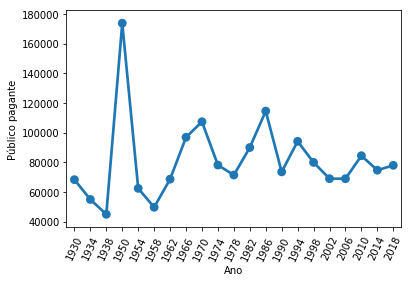

In [13]:
# Vamos fazer um gráfico mostrando a evolução do público pagante

# importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

# Mágica do matplotlib
%matplotlib inline

# Plotando um gráfico de linhas
sns.pointplot(x='Ano', y='Público pagante', data=df)

# Ajustar a legenda de anos
plt.xticks(rotation=65)
plt.show()